## This is project is to predict the wellhead pressure and flow pattern within the well

![shale well](img/shallwellimg.jpg)

### Import modules

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

%matplotlib inline

### Read raw data

In [2]:
df=pd.read_csv('simple_well2.csv')
dfnoise=pd.read_csv('simple_well_noise3.csv')

In [3]:
df.head()

,Date,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1/1/2020,1.990,439.6,4429.671236,5646.8,0.082286,0.809676,0.838839,403668.6203,0.522158,2.567768,0.013021,0.273833,4,2175.632949,212.158344
1,1/2/2020,1.979,429.6,3954.486042,5594.4,0.083133,0.732753,0.824077,369734.8323,0.527079,2.323320,0.012940,0.275160,4,2187.198066,210.639192
2,1/3/2020,1.969,419.9,3554.119221,5542.8,0.083925,0.667531,0.809393,341074.8608,0.531691,2.116113,0.012864,0.276514,4,2197.358736,209.096588
3,1/4/2020,1.959,410.6,3213.437317,5491.9,0.084655,0.611674,0.794856,316619.2477,0.535965,1.938724,0.012791,0.277891,4,2206.134095,207.534762
4,1/5/2020,1.949,401.6,2920.977411,5441.7,0.085334,0.563410,0.780499,295569.5475,0.539954,1.785498,0.012722,0.279288,4,2213.688390,205.957465


In [4]:
df.drop(columns='Date', inplace=True)

In [5]:
dfnoise.drop(columns='Date', inplace=True)

In [6]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1.990,439.6,4429.671236,5646.8,0.082286,0.809676,0.838839,403668.6203,0.522158,2.567768,0.013021,0.273833,4,2175.632949,212.158344
1,1.979,429.6,3954.486042,5594.4,0.083133,0.732753,0.824077,369734.8323,0.527079,2.323320,0.012940,0.275160,4,2187.198066,210.639192
2,1.969,419.9,3554.119221,5542.8,0.083925,0.667531,0.809393,341074.8608,0.531691,2.116113,0.012864,0.276514,4,2197.358736,209.096588
3,1.959,410.6,3213.437317,5491.9,0.084655,0.611674,0.794856,316619.2477,0.535965,1.938724,0.012791,0.277891,4,2206.134095,207.534762
4,1.949,401.6,2920.977411,5441.7,0.085334,0.563410,0.780499,295569.5475,0.539954,1.785498,0.012722,0.279288,4,2213.688390,205.957465


In [7]:
df['FlowPatternGasLiquid6'].nunique()

2

zero hot encoding

In [8]:
df2=pd.get_dummies(df['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [9]:
dfnoise2=pd.get_dummies(dfnoise['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [10]:
df2.head()

,FlowPattern_3,FlowPattern_4
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [11]:
df=pd.concat([df,df2],axis=1)

In [12]:
dfnoise=pd.concat([dfnoise,dfnoise2],axis=1)

In [13]:
df.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [14]:
dfnoise.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [15]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,1.990,439.6,4429.671236,5646.8,0.082286,0.809676,0.838839,403668.6203,0.522158,2.567768,0.013021,0.273833,2175.632949,212.158344,0,1
1,1.979,429.6,3954.486042,5594.4,0.083133,0.732753,0.824077,369734.8323,0.527079,2.323320,0.012940,0.275160,2187.198066,210.639192,0,1
2,1.969,419.9,3554.119221,5542.8,0.083925,0.667531,0.809393,341074.8608,0.531691,2.116113,0.012864,0.276514,2197.358736,209.096588,0,1
3,1.959,410.6,3213.437317,5491.9,0.084655,0.611674,0.794856,316619.2477,0.535965,1.938724,0.012791,0.277891,2206.134095,207.534762,0,1
4,1.949,401.6,2920.977411,5441.7,0.085334,0.563410,0.780499,295569.5475,0.539954,1.785498,0.012722,0.279288,2213.688390,205.957465,0,1


In [16]:
dfnoise.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,2.002,442.2,4589.139400,5714.6,0.081595,0.839249,0.845649,413949.5027,0.511382,2.653231,0.012656,0.273348,2218.335761,212.651966,0,1
1,1.937,423.2,4049.393707,5706.3,0.079080,0.752242,0.836687,371353.2559,0.490838,2.372266,0.012323,0.274702,2258.367024,211.128585,0,1
2,1.922,413.6,3596.768652,5487.4,0.082463,0.668271,0.810318,343398.8686,0.532550,2.128514,0.013427,0.276586,2132.427828,209.239809,0,1
3,1.988,419.2,3261.638877,5458.9,0.086243,0.619788,0.792928,322576.7052,0.550711,1.968633,0.013022,0.277707,2178.909530,207.699399,0,1
4,1.978,407.6,2999.843801,5332.9,0.088403,0.571403,0.773257,306047.9193,0.575918,1.823825,0.013569,0.279261,2119.901822,206.199223,0,1


In [17]:
y_pre=df['FINAPRESS']
X_pre=df.drop(columns=['FINAPRESS','FINATEMP'], axis=1)
X_pre=X_pre.iloc[:,0:4]
X_pre.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig
0,1.990,439.6,4429.671236,5646.8
1,1.979,429.6,3954.486042,5594.4
2,1.969,419.9,3554.119221,5542.8
3,1.959,410.6,3213.437317,5491.9
4,1.949,401.6,2920.977411,5441.7


In [18]:
y_hol=df['HoldupFractionLiquid6']
X_hol=df.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)

In [19]:
y_pat=df[['FlowPattern_3','FlowPattern_4']]
X_pat=df.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)

In [20]:
y_noisepre=dfnoise['FINAPRESS']
X_noisepre=dfnoise.drop(columns=['FINAPRESS','FINATEMP'], axis=1)
X_noisepre=X_noisepre.iloc[:,0:4]
y_noisehol=dfnoise['HoldupFractionLiquid6']
X_noisehol=dfnoise.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)
y_noisepat=dfnoise[['FlowPattern_3','FlowPattern_4']]
X_noisepat=dfnoise.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)


In [21]:
X_noisepre.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig
0,2.002,442.2,4589.139400,5714.6
1,1.937,423.2,4049.393707,5706.3
2,1.922,413.6,3596.768652,5487.4
3,1.988,419.2,3261.638877,5458.9
4,1.978,407.6,2999.843801,5332.9


### Plot the data

In [22]:
def four_y_plot(paraa, labela, parab, labelb, parac, labelc, parad, labeld, labelx, title):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
    
    fig, host = plt.subplots(figsize=(10, 8))
    fig.subplots_adjust(right=1)
    
    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.1))
    par3.spines["right"].set_position(("axes", 1.2))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    make_patch_spines_invisible(par3)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)
    par3.spines["right"].set_visible(True)
    
    p1, = host.plot(paraa, "b-", label=labela)
    p2, = par1.plot(parab, "r-", label=labelb)
    p3, = par2.plot(parac, "g-", label=labelc)
    p4, = par3.plot(parad, "black", label=labeld)
    
    # host.set_xlim(0, 250)
    # host.set_ylim(0, 2.2)
    # par1.set_ylim(0, 500)
    # par2.set_ylim(1, 5000)
    # par3.set_ylim(1, 6000)
    
    host.set_xlabel(labelx, fontsize=14)
    host.set_ylabel(labela, fontsize=14)
    par1.set_ylabel(labelb, fontsize=14)
    par2.set_ylabel(labelc, fontsize=14)
    par3.set_ylabel(labeld, fontsize=14)
    
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    par3.yaxis.label.set_color(p4.get_color())
    
    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), labelsize=12)
    par1.tick_params(axis='y', colors=p2.get_color(), labelsize=12)
    par2.tick_params(axis='y', colors=p3.get_color(), labelsize=12)
    par3.tick_params(axis='y', colors=p4.get_color(), labelsize=12)
    host.tick_params(axis='x', labelsize=14)
    
    lines = [p1, p2, p3, p4]
    
    host.legend(lines, [l.get_label() for l in lines], fontsize=14)
    plt.title(title, fontsize=16)
    
    plt.show()

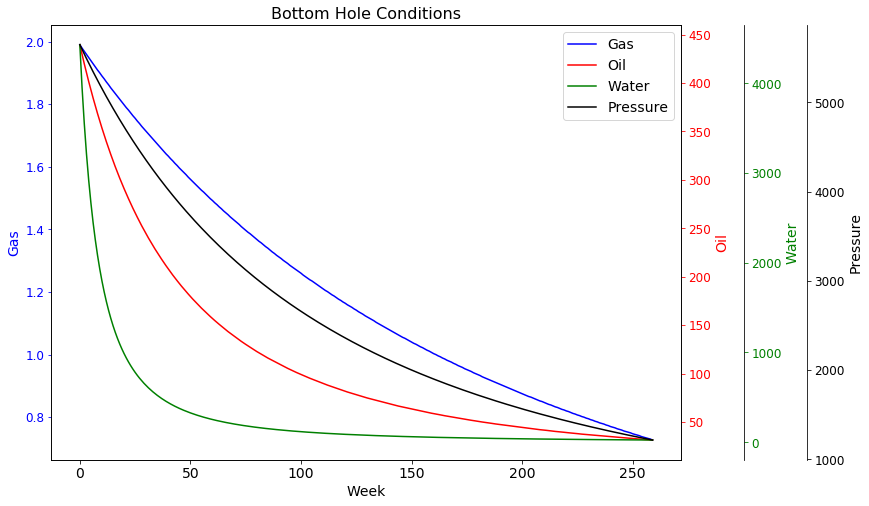

In [23]:
four_y_plot(df['Gas Flow_MMSCFD'], "Gas",
            df['Oil_bpd'], "Oil", 
            df['Water_bpd'],"Water",
            df['FWHP_psig'], "Pressure",
            "Week",
            "Bottom Hole Conditions")

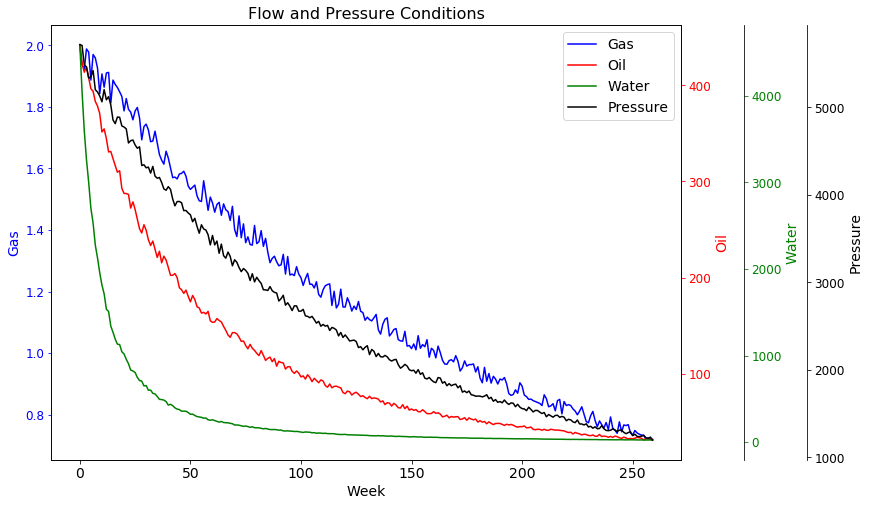

In [24]:
four_y_plot(dfnoise['Gas Flow_MMSCFD'], "Gas",
            dfnoise['Oil_bpd'], "Oil", 
            dfnoise['Water_bpd'],"Water",
            dfnoise['FWHP_psig'], "Pressure",
            "Week",
            "Flow and Pressure Conditions")

Prepare train and test data

In [25]:
X_pre= preprocessing.StandardScaler().fit(X_pre).transform(X_pre)
X_pre[0:5]
X_hol= preprocessing.StandardScaler().fit(X_hol).transform(X_hol)
X_hol[0:5]

array([[ 2.23970334,  3.42406948,  6.58216053,  2.56736951, -0.91667945,
         6.08774454,  5.96778178, -1.1171822 ,  6.10578084, -0.97945762,
        -1.55850943,  1.62196475, -2.1015867 ,  2.1015867 ],
       [ 2.20859484,  3.31882994,  5.82415528,  2.52325256, -0.67955852,
         5.44879228,  5.34489299, -1.1025325 ,  5.46206381, -0.9953094 ,
        -1.55156806,  1.6381069 , -2.1015867 ,  2.1015867 ],
       [ 2.18031439,  3.21674759,  5.18549869,  2.47980915, -0.45787437,
         4.90702618,  4.8188104 , -1.08880367,  4.91641874, -1.01042225,
        -1.54448407,  1.65228878, -2.1015867 ,  2.1015867 ],
       [ 2.15203393,  3.11887482,  4.64205021,  2.43695509, -0.25349493,
         4.44305372,  4.36990303, -1.07608214,  4.44929304, -1.02469809,
        -1.53727698,  1.6645371 , -2.1015867 ,  2.1015867 ],
       [ 2.12375347,  3.02415924,  4.17552442,  2.39469038, -0.06353338,
         4.04215813,  3.98351463, -1.06420598,  4.04579491, -1.03825211,
        -1.52996661,  1.67

In [26]:
X_noisepre= preprocessing.StandardScaler().fit(X_noisepre).transform(X_noisepre)

X_noisehol= preprocessing.StandardScaler().fit(X_noisehol).transform(X_noisehol)

In [27]:
X_train0=X_pre[0:182]
y_train0=y_pre[0:182]
X_test0=X_pre[182:]
y_test0=y_pre[182:]
# hold up data
X_hol_train0=X_hol[0:182]
y_hol_train0=y_hol[0:182]
X_hol_test0=X_hol[182:]
y_hol_test0=y_hol[182:]

In [28]:
X_noisetrain0=X_noisepre[0:182]
y_noisetrain0=y_noisepre[0:182]
X_noisetest0=X_noisepre[182:]
y_noisetest0=y_noisepre[182:]
# hold up data
X_hol_noisetrain0=X_noisehol[0:182]
y_hol_noisetrain0=y_noisehol[0:182]
X_hol_noisetest0=X_noisehol[182:]
y_hol_noisetest0=y_noisehol[182:]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_pre[0:182],y_pre[0:182], test_size=0.05,random_state=21)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
y_test.shape[0]

Train set: (172, 4) (172,)
Test set: (10, 4) (10,)


10

# *SVM*

In [30]:
from sklearn import svm
from sklearn import metrics
from sklearn import model_selection



In [31]:

# Parameters for smooth line input
svr_rbf = svm.SVR(kernel='rbf', C=3000, gamma=0.0019, epsilon=0.1)
svr_lin = svm.SVR(kernel='linear', C=52, gamma=0.1, epsilon=0.1)
svr_poly = svm.SVR(kernel='poly',gamma=1, degree=3, epsilon=.1,
               coef0=2.1)

clf=svr_lin.fit(X_train0, y_train0)
print(clf.score(X_test0,y_test0))
y_hat=svr_lin.predict(X_test0)

# print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))

-1.274227089971383


## Hyperparamter tuning

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.
C_range = 10. ** np.arange(-3, 6)
gamma_range = 10. ** np.arange(-5, 4)
param_grid = dict(gamma=gamma_range, C=C_range)

X=X_noisetrain0
y=y_noisetrain0

grid = GridSearchCV(svm.SVR(kernel='linear'), param_grid=param_grid, refit=True, verbose=3)
grid.fit(X, y)
print("The best classifier is: ", grid.best_estimator_)
# plot the scores of the grid
# grid_scores_ contains parameter settings and scores


 total=   0.0s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............... C=100.0, gamma=1000.0, score=0.725, total=   0.0s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............... C=100.0, gamma=1000.0, score=0.925, total=   0.0s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............... C=100.0, gamma=1000.0, score=0.942, total=   0.0s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............... C=100.0, gamma=1000.0, score=0.965, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............ C=1000.0, gamma=1e-05, score=-175.496, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.892, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.985, total

In [32]:
def cross_valuations(svr_, Xdata, ydata, nsplit, s1, l1, s2, l2, s3, l3):
    
    kfold = model_selection.KFold(n_splits=nsplit, random_state=21, shuffle=True)
    
    scores = [s1, s2, s3]
    labels = [l1, l2, l3]
    
    for ix, score in enumerate(scores):
        results = model_selection.cross_val_score(svr_, Xdata, ydata, cv=kfold, scoring=scores[ix])
        print("SVR", svr_.kernel,labels[ix],format(results.mean(),'.4f'), format(results.std(),'.4f'))
    print('\n')   
    
   

Evaluate different algorithms

In [33]:
svrs = [svr_rbf, svr_lin, svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_train0,
                 y_train0,
                 7,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -53.2329 4.7236
SVR rbf RMSE: -63.9629 5.5175
SVR rbf R^2: 0.9882 0.0035


SVR linear MAE: -29.2879 2.5449
SVR linear RMSE: -43.3215 10.5903
SVR linear R^2: 0.9945 0.0023


SVR poly MAE: -6.2728 1.7281
SVR poly RMSE: -7.8458 1.9056
SVR poly R^2: 0.9998 0.0001




In [34]:
def three_svr_plot(svr1, label1, svr2, label2, svr3, label3, trainx, trainy, testx, testy, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    svrs = [svr1, svr2, svr3]
    kernel_label = [label1, label2, label3]
    model_color = ['b', 'c', 'g']
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 12), sharey=True)
    for ix, svr in enumerate(svrs):
        y_hat=svr.fit(trainx, trainy).predict(testx)
        
        MAE=format(metrics.mean_absolute_error(testy, y_hat),'.3f')
        MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
        R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
        axes[ix].plot(y_hat, color=model_color[ix], lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(kernel_label[ix], MAE, R2))
        axes[ix].plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
        axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                        ncol=1, fancybox=False, shadow=False, fontsize=14)
    fig.text(0.5, 0.04, labelx, ha='center', va='center', fontsize=12)
    fig.text(0.06, 0.5, labely, ha='center', va='center', rotation='vertical', fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

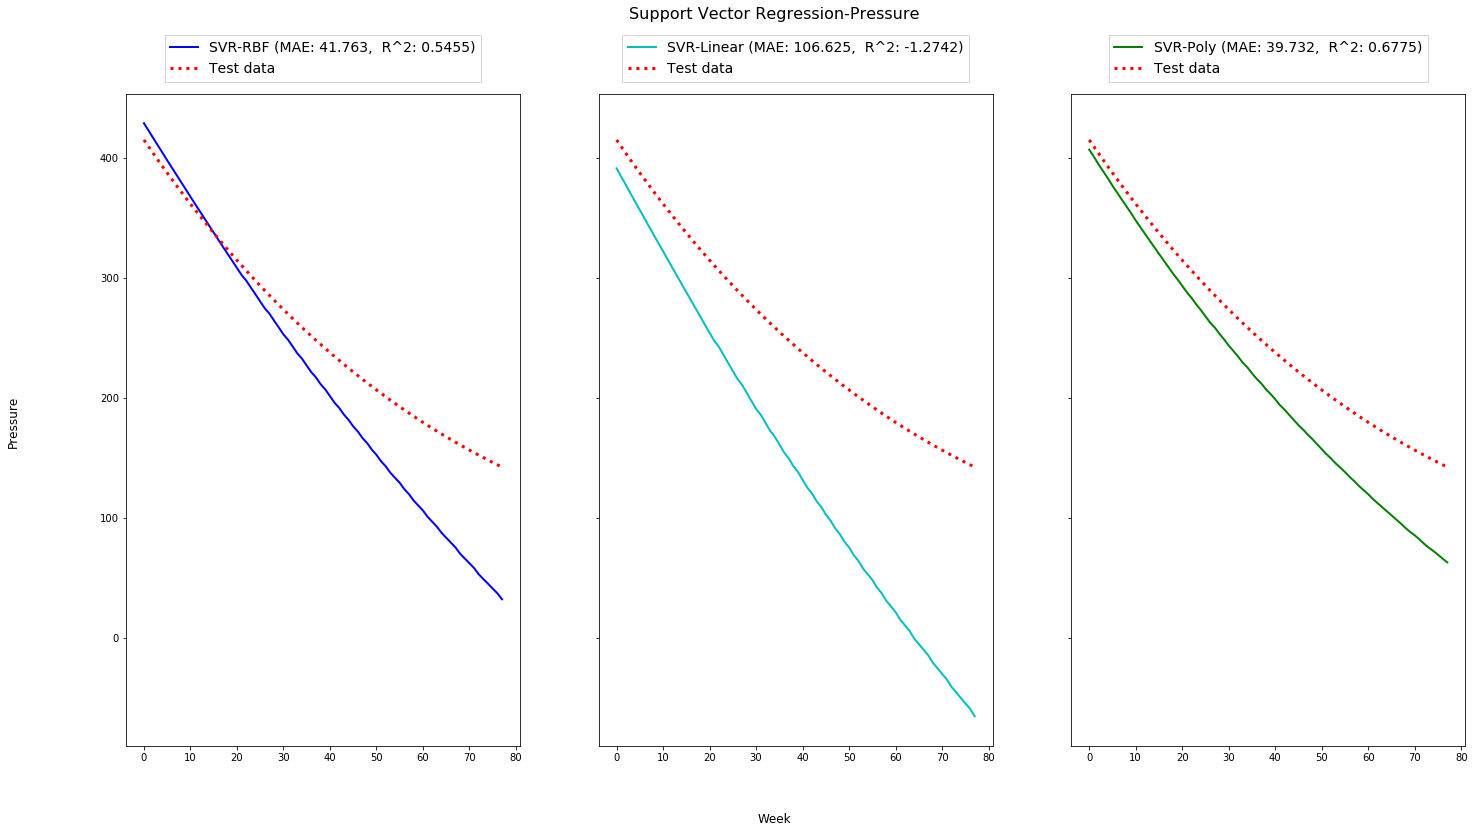

In [35]:
three_svr_plot(svr_rbf, "SVR-RBF",
               svr_lin, "SVR-Linear",
               svr_poly, "SVR-Poly",
               X_train0,
               y_train0,
               X_test0,
               y_test0,
               "Week",
               "Pressure",
               "Support Vector Regression-Pressure")

## Hyperparamter tuning for noise data

In [ ]:
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.
C_range = 10. ** np.arange(-3, 6)
gamma_range = 10. ** np.arange(-5, 4)
param_grid = dict(gamma=gamma_range, C=C_range)

X=X_noisetrain0
y=y_noisetrain0

grid = GridSearchCV(svm.SVR(kernel='linear'), param_grid=param_grid, refit=True, verbose=3)
grid.fit(X, y)
print("The best classifier is: ", grid.best_estimator_)
# plot the scores of the grid
# grid_scores_ contains parameter settings and scores

In [175]:
# Paramters for noise input

svr_rbf = svm.SVR(kernel='rbf', C=100000, gamma=0.1, epsilon=0.001)

svr_lin = svm.SVR(kernel='linear', C=12, gamma=0.1, epsilon=0.1)
#svr_lin = svm.SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
#    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)  #Hyperparamter results

svr_poly = svm.SVR(kernel='poly',gamma=0.4, degree=5, epsilon=0.1,
               coef0=5)



In [177]:
svrs = [svr_rbf, svr_lin, svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_noisetrain0,
                 y_noisetrain0,
                 7,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -2.0357 1.3963
SVR rbf RMSE: -6.1841 7.2713
SVR rbf R^2: 0.9998 0.0004


SVR linear MAE: -73.9324 10.3392
SVR linear RMSE: -87.6549 11.2764
SVR linear R^2: 0.9779 0.0065


SVR poly MAE: -3.0878 0.7154
SVR poly RMSE: -5.0970 3.2385
SVR poly R^2: 0.9999 0.0001




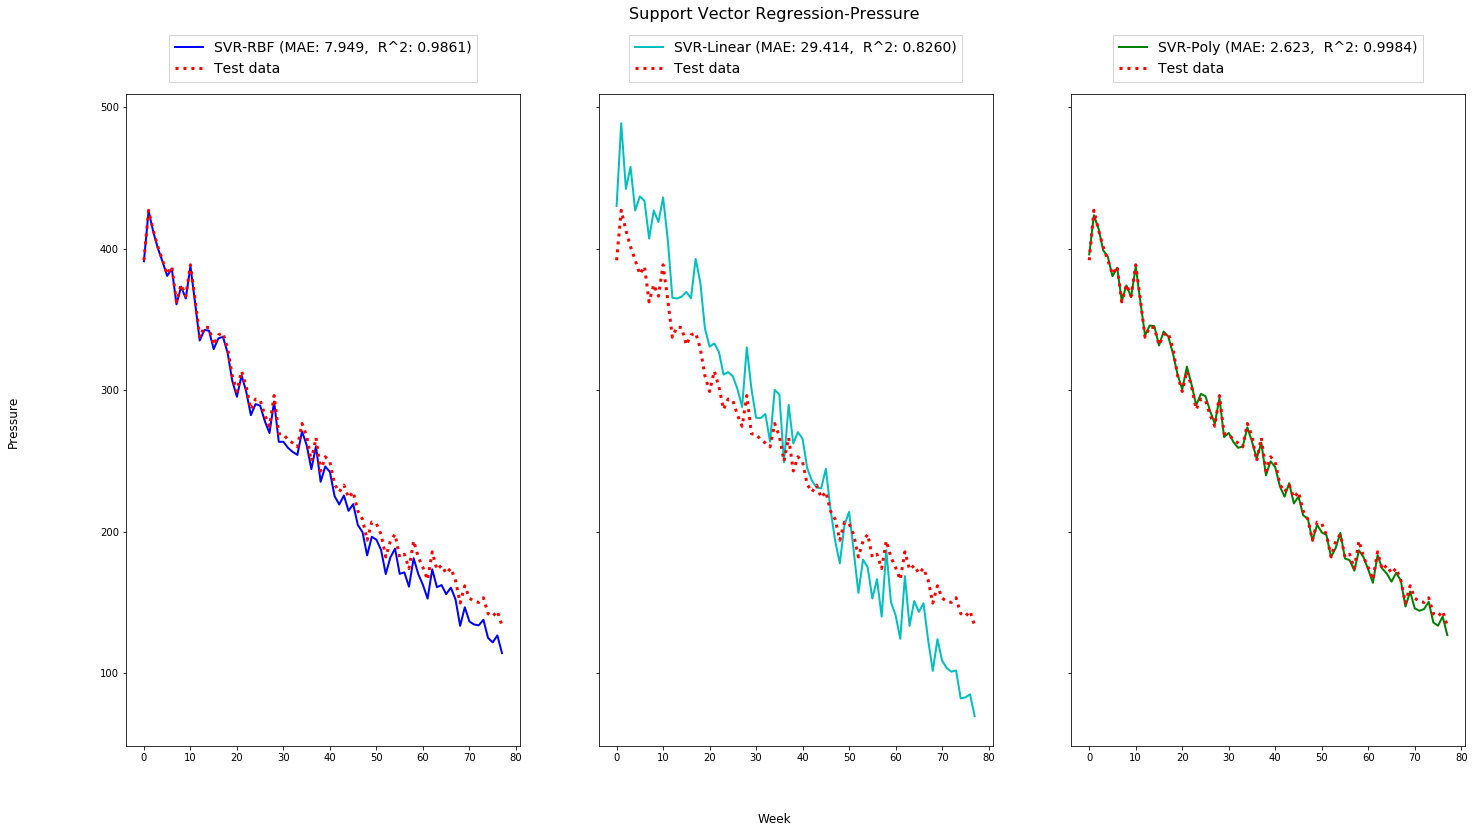

In [176]:
three_svr_plot(svr_rbf, "SVR-RBF",
               svr_lin, "SVR-Linear",
               svr_poly, "SVR-Poly",
               X_noisetrain0,
               y_noisetrain0,
               X_noisetest0,
               y_noisetest0,
               "Week",
               "Pressure",
               "Support Vector Regression-Pressure")

Predict Holdup

In [178]:
hol_svr_rbf = svm.SVR(kernel='rbf', C=10, gamma=0.001, epsilon=0.0001)
hol_svr_lin = svm.SVR(kernel='linear', C=0.2, gamma=0.005, epsilon=0.0001)
hol_svr_poly = svm.SVR(kernel='poly',gamma=0.01, degree=3, epsilon=.0001,
               coef0=0.6)

svrs = [hol_svr_rbf, hol_svr_lin, hol_svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_hol_train0,
                 y_hol_train0,
                 10,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -0.0029 0.0011
SVR rbf RMSE: -0.0059 0.0022
SVR rbf R^2: 0.9936 0.0111


SVR linear MAE: -0.0021 0.0007
SVR linear RMSE: -0.0041 0.0017
SVR linear R^2: 0.9965 0.0067


SVR poly MAE: -0.0003 0.0001
SVR poly RMSE: -0.0005 0.0002
SVR poly R^2: 1.0000 0.0001




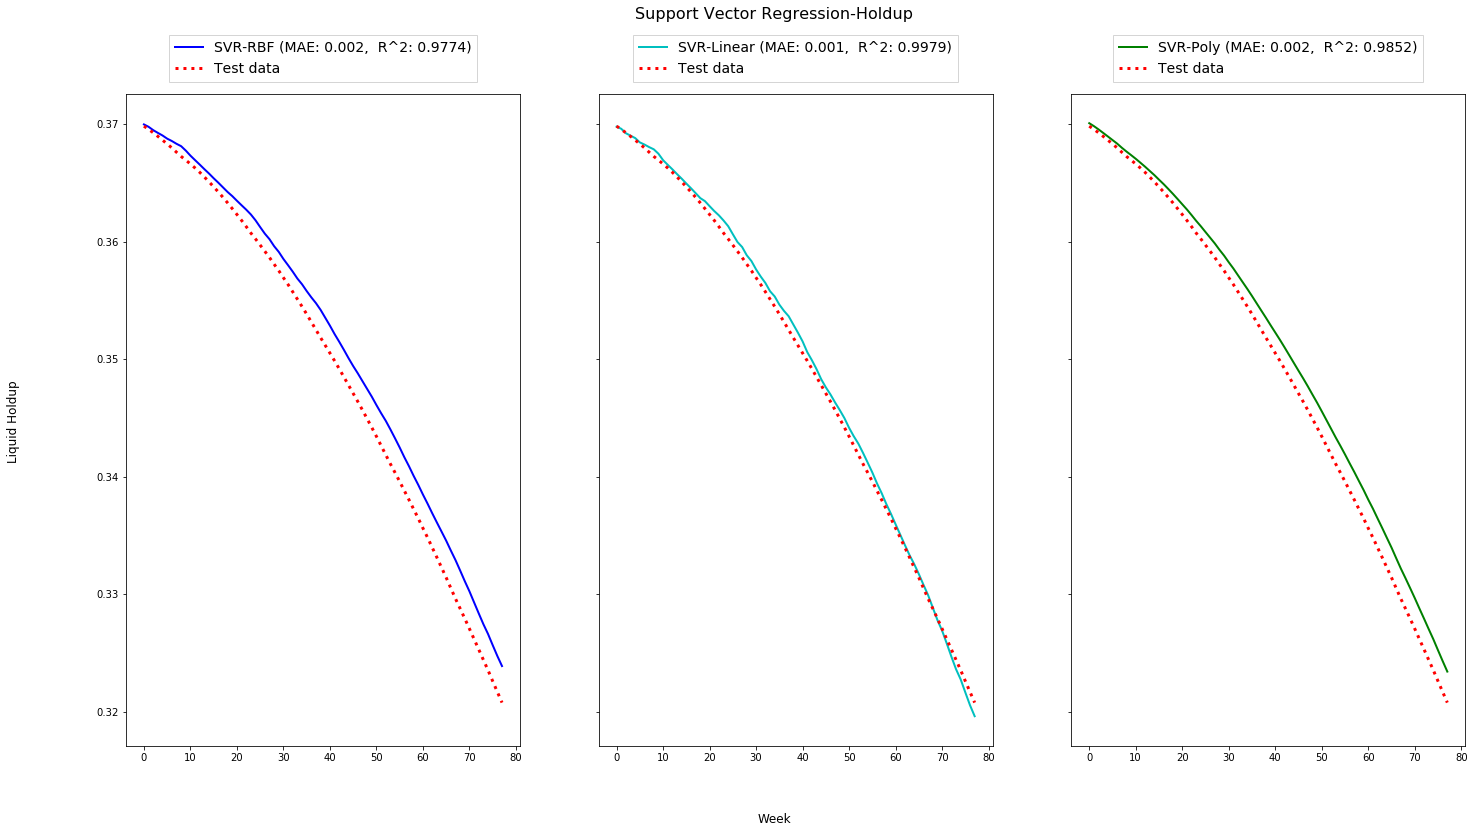

In [179]:
three_svr_plot(hol_svr_rbf, "SVR-RBF",
               hol_svr_lin, "SVR-Linear",
               hol_svr_poly, "SVR-Poly",
               X_hol_train0,
               y_hol_train0,
               X_hol_test0,
               y_hol_test0,
               "Week",
               "Liquid Holdup",
               "Support Vector Regression-Holdup")

## Hyperparamter

In [211]:
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.
C_range = [0.01,0.1,0.5,1,10,100,1000,10000]
gamma_range = [0.000001,0.00001,0.0001,0.001,0.01,0.1,0.5]
epsilon_range = [0.000001,0.00001,0.0001,0.001,0.01,0.1,0.5]

param_grid = dict(gamma=gamma_range, C=C_range, epsilon=epsilon_range)

X=X_noisetrain0
y=y_hol_noisetrain0

grid = GridSearchCV(svm.SVR(kernel='linear'), param_grid=param_grid, refit=True, verbose=3)
grid.fit(X, y)
print("The best classifier is: ", grid.best_estimator_)
# plot the scores of the grid
# grid_scores_ contains parameter settings and scores

 score=-12.942, total=   3.1s
[CV] C=1000, epsilon=0.01, gamma=0.01 ................................
[CV] .. C=1000, epsilon=0.01, gamma=0.01, score=-14.317, total=   2.8s
[CV] C=1000, epsilon=0.01, gamma=0.1 .................................
[CV] .... C=1000, epsilon=0.01, gamma=0.1, score=-7.578, total=   0.2s
[CV] C=1000, epsilon=0.01, gamma=0.1 .................................
[CV] ..... C=1000, epsilon=0.01, gamma=0.1, score=0.007, total=   2.9s
[CV] C=1000, epsilon=0.01, gamma=0.1 .................................
[CV] .... C=1000, epsilon=0.01, gamma=0.1, score=-2.888, total=   4.7s
[CV] C=1000, epsilon=0.01, gamma=0.1 .................................
[CV] ... C=1000, epsilon=0.01, gamma=0.1, score=-12.942, total=   3.1s
[CV] C=1000, epsilon=0.01, gamma=0.1 .................................
[CV] ... C=1000, epsilon=0.01, gamma=0.1, score=-14.317, total=   2.8s
[CV] C=1000, epsilon=0.01, gamma=0.5 .................................
[CV] .... C=1000, epsilon=0.01, gamma=0.5, scor

In [209]:

# hol_svr_rbf = svm.SVR(kernel='rbf', C=90, gamma=0.001, epsilon=0.0001)
hol_svr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.001, epsilon=0.0001)

# hol_svr_lin = svm.SVR(kernel='linear', C=0.8, gamma=0.004, epsilon=0.0001)
hol_svr_lin = svm.SVR(kernel='linear', C=0.01, gamma=0.000001, epsilon=0.0001)

hol_svr_poly = svm.SVR(kernel='poly',gamma=0.01, degree=4, epsilon=.00001,
               coef0=0.6)

svrs = [hol_svr_rbf, hol_svr_lin, hol_svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_noisetrain0,
                 y_hol_noisetrain0,
                 10,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -0.0088 0.0009
SVR rbf RMSE: -0.0109 0.0012
SVR rbf R^2: 0.9867 0.0107


SVR linear MAE: -0.0164 0.0047
SVR linear RMSE: -0.0246 0.0096
SVR linear R^2: 0.9465 0.0225


SVR poly MAE: -0.0078 0.0011
SVR poly RMSE: -0.0102 0.0013
SVR poly R^2: 0.9884 0.0079




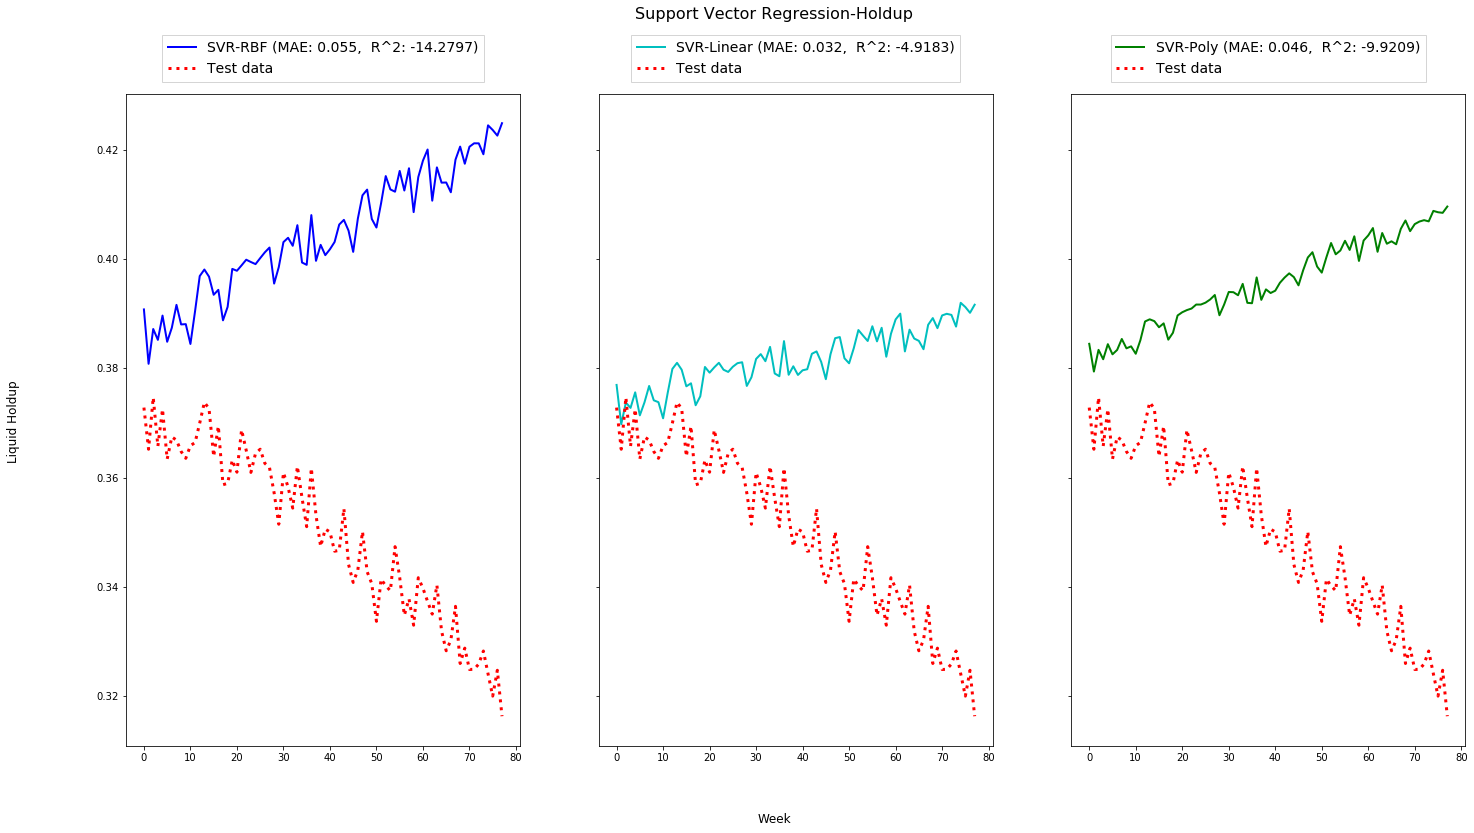

In [210]:
three_svr_plot(hol_svr_rbf, "SVR-RBF",
               hol_svr_lin, "SVR-Linear",
               hol_svr_poly, "SVR-Poly",
               X_noisetrain0,
               y_hol_noisetrain0,
               X_noisetest0,
               y_hol_noisetest0,
               "Week",
               "Liquid Holdup",
               "Support Vector Regression-Holdup")

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

X_train=X_noisetrain0
y_train=y_noisetrain0

X_test=X_noisetest0
y_test=y_noisetest0

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbrt= GradientBoostingRegressor(**params)


kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(gbrt, X_train, y_train, cv=kfold)
print("Cross Val Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


gbrt.fit(X_noisetrain0, y_noisetrain0)
y_pred = gbrt.predict(X_noisetest0)

MAE=format(metrics.mean_absolute_error(y_noisetest0, y_pred),'.3f')
MSE=format(metrics.mean_squared_error(y_noisetest0, y_pred),'.2f')
R2=format(metrics.r2_score(y_noisetest0, y_pred),'.4f')       

lin_mse = mean_squared_error(y_pred, y_noisetest0)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: %.4f' % lin_rmse)
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:',  R2)


## Define comparion plot

In [ ]:
def comp_plot(ml1, label1, trainx, trainy, testx, testy, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    fig= plt.figure(figsize=(12, 10))
   
    y_hat=ml1.fit(trainx, trainy).predict(testx)
        
    MAE=format(metrics.mean_absolute_error(testy, y_hat),'.3f')
    MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
    R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
    plt.plot(y_hat, color='blue', lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(label1, MAE, R2))
    plt.plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
    plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.1),fontsize=12)
    plt.xlabel(labelx, fontsize=12)
    plt.ylabel(labely, fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

In [ ]:
comp_plot(gbrt, "GBRT",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "Gradient Boost")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
params = {'n_estimators': 500, 'max_depth': 30, 'random_state': 0,}

RFR = RandomForestRegressor(**params)

In [ ]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    RFR.set_params(n_estimators=n)
    RFR.fit(X_train, y_train)
    scores.append(RFR.score(X_test, y_test))
fig= plt.figure(figsize=(8, 6))
plt.xlabel("n_estimator",fontsize=12)
plt.ylabel("score",fontsize=12)
fig.suptitle("Effect of n_estimators", fontsize=16)
plt.plot(estimators, scores)
plt.show()

In [ ]:
comp_plot(RFR, "RFR",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "Random Forest")

# XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

In [ ]:
params={'colsample_bytree': 0.7587948587257435, 'gamma': 0.022613644455269033, 'learning_rate': 0.1275990992289793, 'max_depth': 5, 'n_estimators': 144, 'subsample': 0.7085396127095583}

xgbr = xgb.XGBRegressor(**params)

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

MAE=format(metrics.mean_absolute_error(y_test, y_pred),'.3f')
MSE=format(metrics.mean_squared_error(y_test, y_pred),'.2f')
R2=format(metrics.r2_score(y_test, y_pred),'.4f')       

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: %.4f' % lin_rmse)
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:',  R2)

In [ ]:
comp_plot(xgbr, "XGBoost",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "XGBoost")

In [ ]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

Hyperparameter tuning

In [ ]:
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)

Evaluation